In [3]:
import pandas as pd

# Load data hasil feature engineering
df = pd.read_csv("../data/gld_features.csv", index_col='Date', parse_dates=True)

# Daftar fitur
features = ['Open', 'High', 'Low', 'Close', 'Volume',
            'MA5', 'MA10', 'MA20', 'RSI', 'MACD', 'Signal', 'Return', 'Volatility']


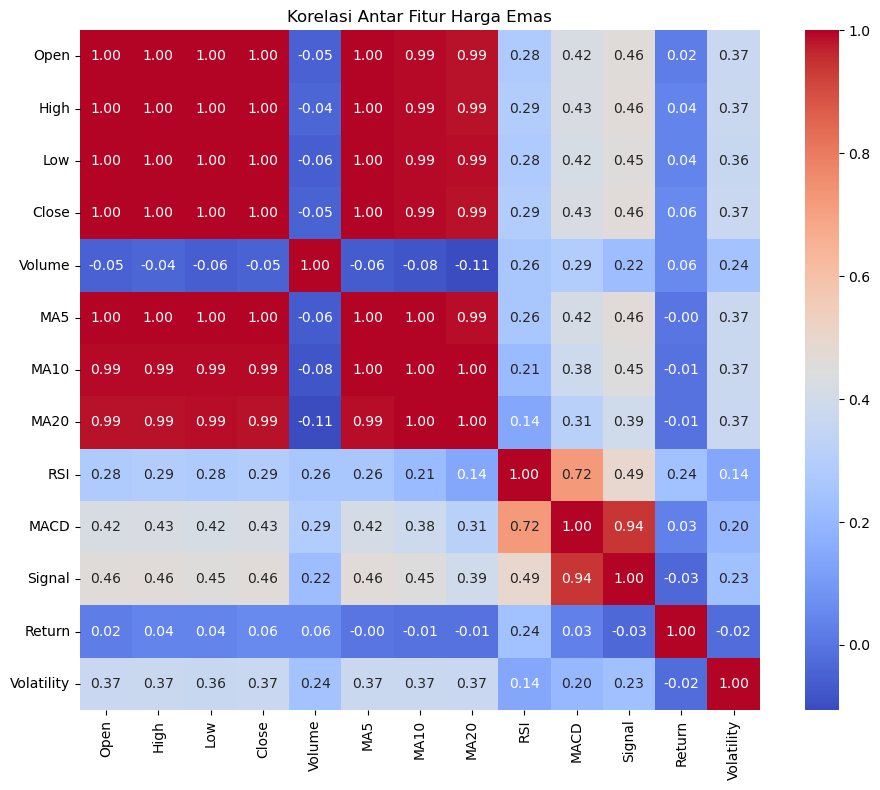

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung korelasi antar fitur
correlation = df[features].corr()

# Plot
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Korelasi Antar Fitur Harga Emas")
plt.tight_layout()
plt.show()


In [6]:
# Buat sinyal BUY (1) atau SELL (0) dari Target_UpDown
df["Signal_UpDown"] = df["Target_UpDown"].map({1: "BUY", 0: "SELL"})

# Ambil 10 hari terakhir untuk ditampilkan
df_signals = df[["Close", "RSI", "MACD", "MA5", "Signal_UpDown"]].tail(10)

# Tampilkan tabel
df_signals


,Close,RSI,MACD,MA5,Signal_UpDown
Date,,,,,
2024-12-16,244.880005,55.071867,0.189386,247.200000,SELL
2024-12-17,243.940002,52.051398,0.043849,246.270001,SELL
2024-12-18,239.259995,42.518557,-0.444010,243.929999,BUY
2024-12-19,239.600006,38.702412,-0.794052,242.394000,BUY
2024-12-20,242.100006,47.505596,-0.859822,241.956003,SELL
2024-12-23,240.960007,44.601999,-0.992493,241.172003,BUY
2024-12-24,241.440002,44.073412,-1.046837,240.672003,BUY
2024-12-26,243.070007,50.387895,-0.947455,241.434006,SELL
2024-12-27,241.399994,47.294940,-0.992015,241.794003,SELL


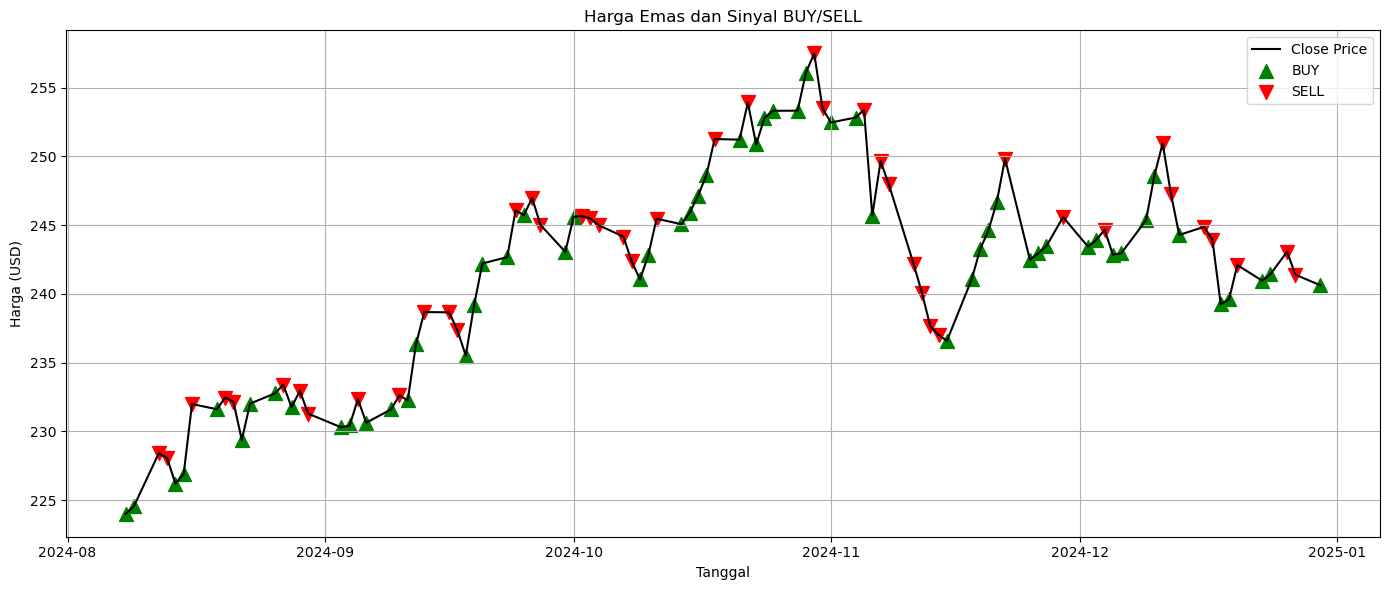

In [8]:
import matplotlib.pyplot as plt

# Ambil 100 hari terakhir
df_plot = df.tail(100)

# Pisahkan sinyal BUY dan SELL
buy_signals = df_plot[df_plot["Signal_UpDown"] == "BUY"]
sell_signals = df_plot[df_plot["Signal_UpDown"] == "SELL"]

plt.figure(figsize=(14,6))
plt.plot(df_plot.index, df_plot["Close"], label="Close Price", color="black")

# Tambahkan marker BUY dan SELL
plt.scatter(buy_signals.index, buy_signals["Close"], label="BUY", marker="^", color="green", s=100)
plt.scatter(sell_signals.index, sell_signals["Close"], label="SELL", marker="v", color="red", s=100)

plt.title("Harga Emas dan Sinyal BUY/SELL")
plt.xlabel("Tanggal")
plt.ylabel("Harga (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
